In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import missingno as mo

In [2]:
df = pd.read_csv("/content/1_data.csv")

In [3]:
df

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_ID           45593 non-null  object 
 1   Delivery_person_Age          45593 non-null  object 
 2   Delivery_person_Ratings      45593 non-null  object 
 3   Restaurant_latitude          45593 non-null  float64
 4   Restaurant_longitude         45593 non-null  float64
 5   Delivery_location_latitude   45593 non-null  float64
 6   Delivery_location_longitude  45593 non-null  float64
 7   Order_Date                   45593 non-null  object 
 8   Time_Orderd                  45593 non-null  object 
 9   Time_Order_picked            45593 non-null  object 
 10  Weatherconditions            45593 non-null  object 
 11  Road_traffic_density         45593 non-null  object 
 12  Vehicle_condition            45593 non-null  int64  
 13  Type_of_order   

# Columnwise Data Assessing
- **`Delivery_person_ID`** -> Extract first 4 letter representing city and rename colm to city
- **`Delivery_person_Age`** and **`Delivery_person_Ratings`** -> change dtype to int and float
- **`Location details cols`** ->handling some locations having 0 and negative values and creating a feature distance
- **`Order_Date`** -> extract weekday and is_weekend
- **`Time_Orderd`** and **`Time_Order_picked`** -> extract food preparation time , order hour and order time of day
- **`Weatherconditions`** -> remove condition word and also space after every word
- **`Vehicle_condition`** -> number represents condition with 0 as besgt and 3 as worst
- **`City`** -> rename to city type
- **`Time_taken(min)`** -> conver to int
- **Imputing Missing Values**


In [5]:
# removing 'conditions' string from every row
df['Weatherconditions'] = df['Weatherconditions'].str.replace('conditions ','')
df['Weatherconditions'].unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', 'NaN'],
      dtype=object)

In [6]:
# replacing NaN with np.nan values in data
df.replace('NaN ',np.nan,inplace=True)
df.replace('NaN',np.nan,inplace=True)

In [7]:
df.isnull().sum()

,0
Delivery_person_ID,0
Delivery_person_Age,1854
Delivery_person_Ratings,1908
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,1731
Time_Order_picked,0


In [8]:
# renaming city to city type
df.rename(columns={'City':'City_type'},inplace=True)

In [9]:
# extracting city from delivery person id and renaming column as city
df['Delivery_person_ID'] = df['Delivery_person_ID'].str.split('RES').str.get(0)
df.rename(columns={'Delivery_person_ID':'City'},inplace=True)

In [10]:
df['City'].unique()

array(['INDO', 'BANG', 'COIMB', 'CHEN', 'HYD', 'RANCHI', 'MYS', 'DEH',
       'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'KOL', 'JAP', 'SUR', 'GOA',
       'AURG', 'AGR', 'VAD', 'ALH', 'BHP'], dtype=object)

In [11]:
# converting datatypes of age and rating column of delivery person and renaming it as rider
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype(float)
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype(float)
df.rename(columns={'Delivery_person_Age':'Rider_age','Delivery_person_Ratings':'Rider_rating'},inplace=True)

In [12]:
df.head()

,City,Rider_age,Rider_rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City_type,Time_taken(min)
0,INDO,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,BANG,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,BANG,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,COIMB,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,CHEN,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


<Axes: >

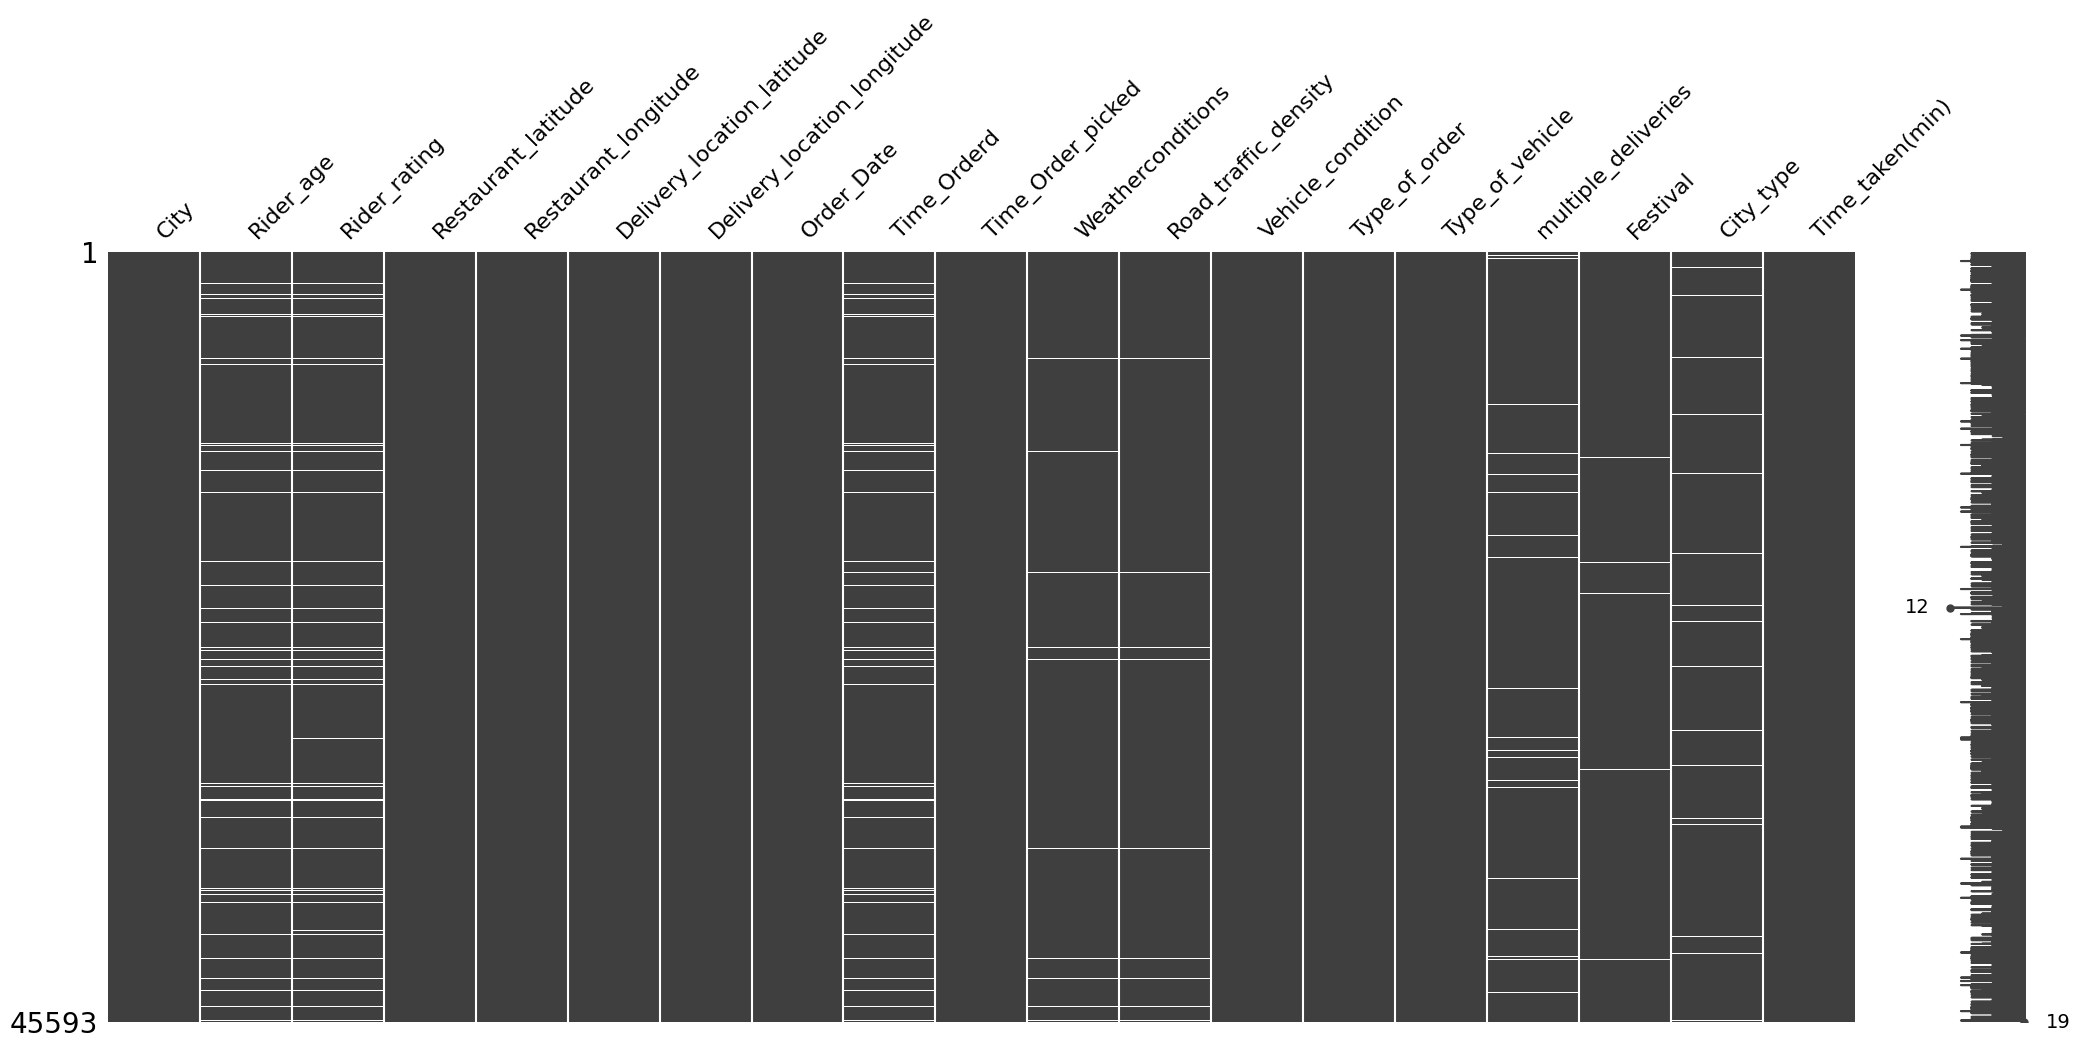

In [13]:
# knowing about the missing data
mo.matrix(df)

In [14]:
# we can see that somehow missing of data in age ,rating and ordered time are correlated
# also in weatercondition and road traffic

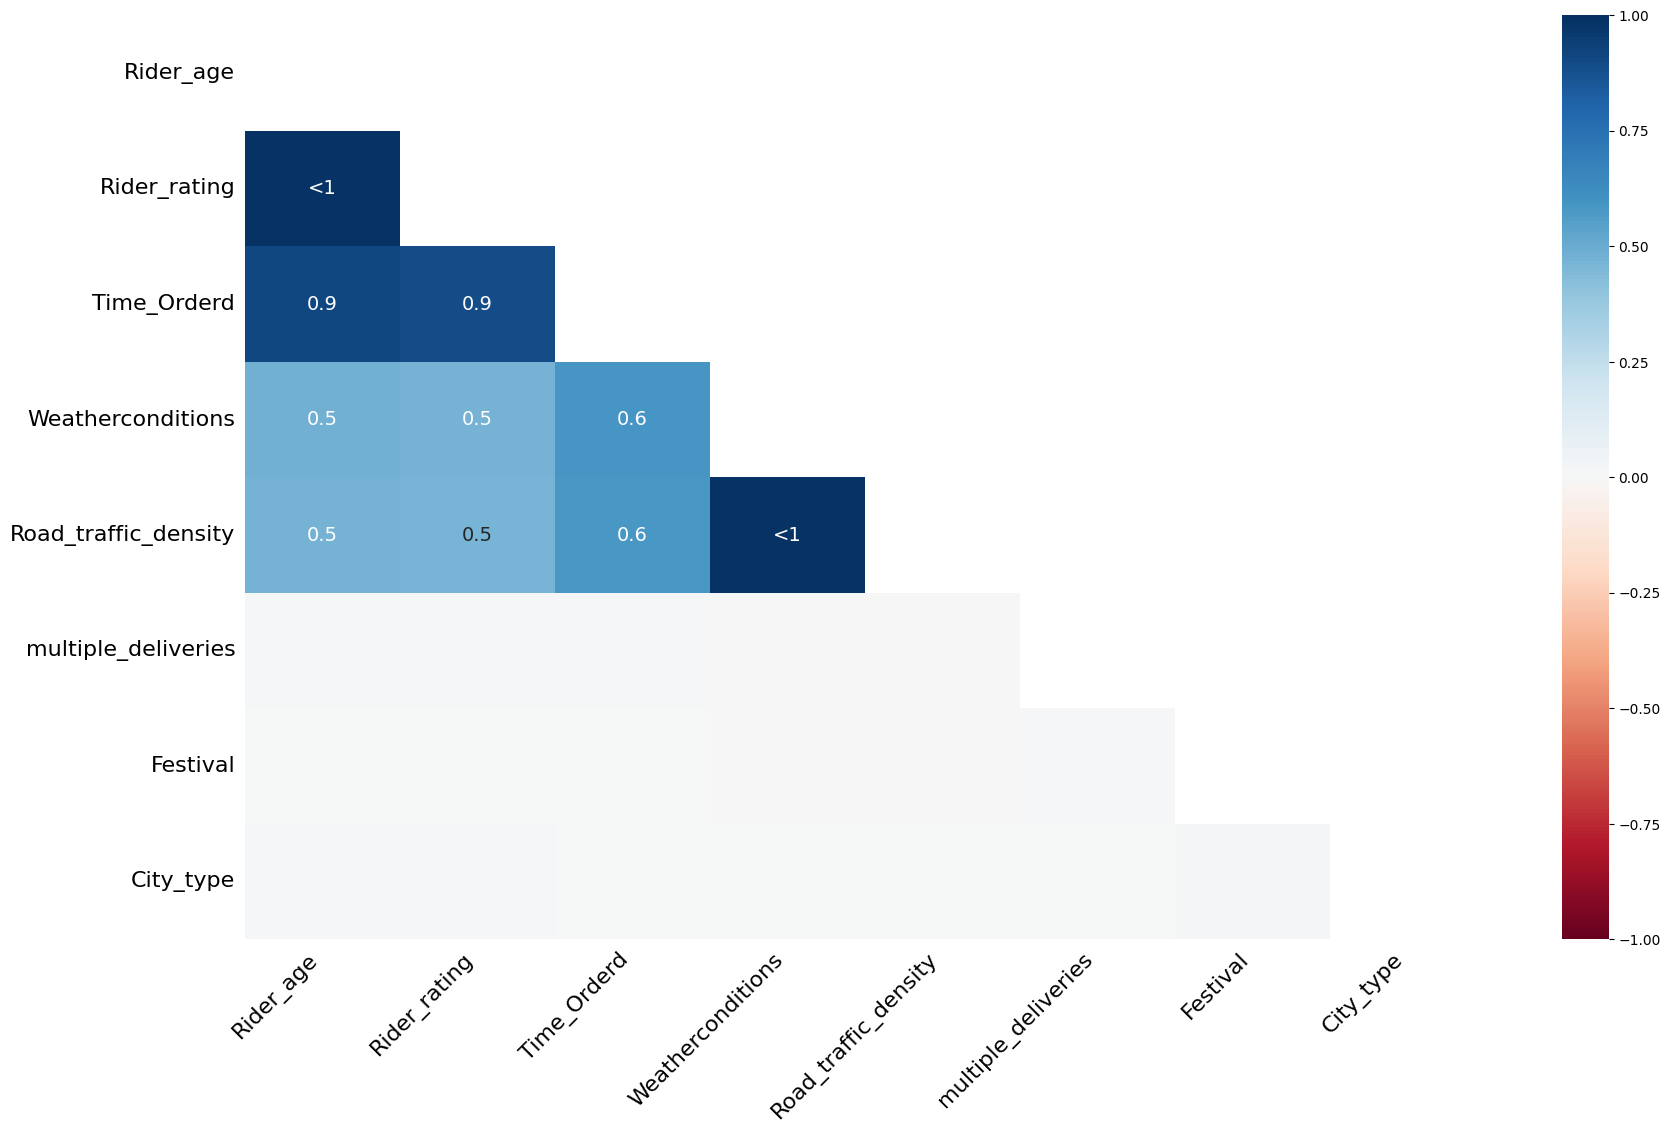

In [15]:
# heatmap for correlation in patterns of data missing from columns
mo.heatmap(df)
plt.show()

- `Rider_rating` and `Time_Ordered` have a correlation of **0.9**, suggesting they often go missing together.

- `Weatherconditions` and `Road_traffic_density`: Moderate correlation (~0.6), which makes sense contextually — if weather data is missing, traffic data might be too.

In [16]:
# renaming complex column names
df.rename(columns={'Time_Orderd':'order_time','Time_Order_picked':'pickup_time','Road_traffic_density':'traffic_type','Delivery_location_latitude':'delivery_latitude',
                   'Delivery_location_longitude':'delivery_longitude'},inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  45593 non-null  object 
 1   Rider_age             43739 non-null  float64
 2   Rider_rating          43685 non-null  float64
 3   Restaurant_latitude   45593 non-null  float64
 4   Restaurant_longitude  45593 non-null  float64
 5   delivery_latitude     45593 non-null  float64
 6   delivery_longitude    45593 non-null  float64
 7   Order_Date            45593 non-null  object 
 8   order_time            43862 non-null  object 
 9   pickup_time           45593 non-null  object 
 10  Weatherconditions     44977 non-null  object 
 11  traffic_type          44992 non-null  object 
 12  Vehicle_condition     45593 non-null  int64  
 13  Type_of_order         45593 non-null  object 
 14  Type_of_vehicle       45593 non-null  object 
 15  multiple_deliveries

## Rider age

In [18]:
df['Rider_age'].describe()

,Rider_age
count,43739.000000
mean,29.567137
std,5.815155
min,15.000000
25%,25.000000
50%,30.000000
75%,35.000000
max,50.000000


In [19]:
# 15 is not legal age ...so we will check rows with age < 18
df[df['Rider_age']<18]

,City,Rider_age,Rider_rating,Restaurant_latitude,Restaurant_longitude,delivery_latitude,delivery_longitude,Order_Date,order_time,pickup_time,Weatherconditions,traffic_type,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City_type,Time_taken(min)
2387,JAP,15.0,1.0,-26.891191,75.802083,26.981191,75.892083,12-03-2022,NaN,17:20:00,NaN,NaN,3,Meal,motorcycle,0,No,Urban,(min) 15
2905,INDO,15.0,1.0,22.750040,75.902847,22.810040,75.962847,03-04-2022,NaN,20:30:00,NaN,NaN,3,Snack,scooter,1,No,Metropolitian,(min) 29
2951,SUR,15.0,1.0,21.149569,72.772697,21.209569,72.832697,21-03-2022,NaN,22:10:00,NaN,NaN,3,Buffet,bicycle,1,No,Metropolitian,(min) 20
5902,CHEN,15.0,1.0,13.026286,80.275235,13.056286,80.305235,11-03-2022,NaN,20:50:00,NaN,NaN,3,Drinks,bicycle,1,No,Metropolitian,(min) 25
9156,BANG,15.0,1.0,12.970324,77.645748,13.080324,77.755748,25-03-2022,NaN,23:25:00,NaN,NaN,3,Buffet,motorcycle,2,No,Metropolitian,(min) 34
10900,MUM,15.0,1.0,19.181300,72.836191,19.231300,72.886191,30-03-2022,NaN,20:55:00,NaN,NaN,3,Buffet,motorcycle,1,No,Metropolitian,(min) 39
11125,SUR,15.0,1.0,-21.183434,-72.814492,21.193434,72.824492,05-03-2022,NaN,11:30:00,NaN,NaN,3,Meal,scooter,1,No,Urban,(min) 27
12093,INDO,15.0,1.0,22.751857,75.866699,22.801857,75.916699,24-03-2022,NaN,21:15:00,NaN,NaN,3,Buffet,bicycle,0,No,Metropolitian,(min) 28
15124,RANCHI,15.0,1.0,0.000000,0.000000,0.070000,0.070000,16-03-2022,NaN,23:55:00,NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 21
15927,CHEN,15.0,1.0,13.022394,80.242439,13.072394,80.292439,11-03-2022,NaN,18:10:00,NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 17


In [20]:
# they all have rating 1 and also the location details have negative values but the data is of india
# all values are missing from weather condition , order time,traffic type
# also they all have worst vehicle condition
# hence we will drop those rows
df.drop(df[df['Rider_age']<18].index,inplace=True)

## Rider rating

<Axes: ylabel='Rider_rating'>

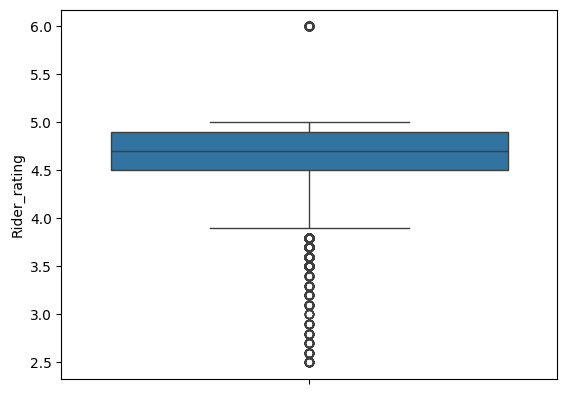

In [21]:
sns.boxplot(df['Rider_rating'])

In [22]:
# the ratings should have max of 5 but there are some rows with 6
df[df['Rider_rating']==6]

,City,Rider_age,Rider_rating,Restaurant_latitude,Restaurant_longitude,delivery_latitude,delivery_longitude,Order_Date,order_time,pickup_time,Weatherconditions,traffic_type,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City_type,Time_taken(min)
3586,BANG,50.0,6.0,-12.970324,-77.645748,13.010324,77.685748,13-03-2022,NaN,12:30:00,NaN,NaN,3,Meal,electric_scooter,0,No,Urban,(min) 25
4714,HYD,50.0,6.0,-17.451976,-78.385883,17.561976,78.495883,04-04-2022,NaN,23:20:00,NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 27
5169,JAP,50.0,6.0,-26.910262,-75.783013,27.020262,75.893013,18-03-2022,NaN,18:50:00,NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,(min) 20
5362,BANG,50.0,6.0,12.914264,77.678400,13.024264,77.788400,06-04-2022,NaN,20:55:00,NaN,NaN,3,Meal,electric_scooter,1,No,Metropolitian,(min) 18
5651,AGR,50.0,6.0,-27.159795,-78.042990,27.209795,78.092990,13-02-2022,NaN,18:05:00,NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,(min) 20
6394,JAP,50.0,6.0,26.911927,75.797282,27.041927,75.927282,02-04-2022,NaN,22:10:00,NaN,NaN,3,Meal,electric_scooter,0,No,Urban,(min) 20
7031,MYS,50.0,6.0,-12.352058,-76.606650,12.372058,76.626650,15-03-2022,NaN,10:00:00,NaN,NaN,3,Buffet,scooter,1,No,Metropolitian,(min) 14
7681,VAD,50.0,6.0,0.000000,0.000000,0.010000,0.010000,21-03-2022,NaN,08:35:00,NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 22
9499,BANG,50.0,6.0,12.933298,77.614293,13.003298,77.684293,12-03-2022,NaN,18:25:00,NaN,NaN,3,Drinks,scooter,1,No,Urban,(min) 17
9535,RANCHI,50.0,6.0,-23.374989,-85.335486,23.444989,85.405486,20-03-2022,NaN,17:55:00,NaN,NaN,3,Snack,bicycle,1,No,Metropolitian,(min) 32


In [23]:
# we have the same type of problems we had with minors age so we will drop these rows
df.drop(df[df['Rider_rating']==6].index,inplace=True)

## location columns

For location based columns
- India lies to the north of the equator between **6° 44′** and **35° 30′** north latitude and **68° 7′** and **97° 25′** east longitude.

In [24]:
df.iloc[:,3:7].describe()

,Restaurant_latitude,Restaurant_longitude,delivery_latitude,delivery_longitude
count,45502.000000,45502.000000,45502.000000,45502.000000
mean,17.046293,70.326557,17.468434,70.848718
std,8.131457,22.591753,7.334058,21.111306
min,-30.905562,-88.352885,0.010000,0.010000
25%,12.933284,73.170283,12.988453,73.280000
50%,18.551440,75.898497,18.634382,76.002471
75%,22.728163,78.045043,22.785049,78.105359
max,30.914057,88.433452,31.054057,88.563452


In [25]:
# we don't have problem in upper bound but minimum values are problem
lower_bound_lat = 6.44
lower_bound_long = 68.70

df.loc[
    (df['Restaurant_latitude'] < lower_bound_lat) |
    (df['Restaurant_longitude'] < lower_bound_long) |
    (df['delivery_latitude'] < lower_bound_lat) |
    (df['delivery_longitude'] < lower_bound_long)
].describe()

,Rider_age,Rider_rating,Restaurant_latitude,Restaurant_longitude,delivery_latitude,delivery_longitude,Vehicle_condition
count,3651.000000,3636.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000
mean,29.583950,4.649395,-2.024551,2.522899,2.087684,7.764720,1.075701
std,5.756878,0.301226,6.385871,24.383056,6.386195,23.271934,0.880371
min,20.000000,2.500000,-30.905562,-88.352885,0.010000,0.010000,0.000000
25%,25.000000,4.600000,0.000000,0.000000,0.040000,0.040000,0.000000
50%,30.000000,4.700000,0.000000,0.000000,0.070000,0.070000,1.000000
75%,35.000000,4.900000,0.000000,0.000000,0.110000,0.110000,2.000000
max,39.000000,5.000000,0.000000,88.433452,31.045562,88.523452,3.000000


In [26]:
# i will try by taking abs of negative data and converting the rest to nan bcoz the main goal of these features is to calculate distance
# there we will impute the missing distance values using KNN
df.iloc[:,3:7] = df.iloc[:,3:7].abs()

In [27]:
len(df.loc[
    (df['Restaurant_latitude'] < lower_bound_lat) |
    (df['Restaurant_longitude'] < lower_bound_long) |
    (df['delivery_latitude'] < lower_bound_lat) |
    (df['delivery_longitude'] < lower_bound_long)
])

3630

In [28]:
# checking if all problamatic ones are having less than 1 value
len(df.loc[
    (df['Restaurant_latitude'] < 1) |
    (df['Restaurant_longitude'] < 1) |
    (df['delivery_latitude'] < 1) |
    (df['delivery_longitude'] < 1)])

3630

In [29]:
for i in df.iloc[:,3:7].columns.to_list():
  ind = df[df[i]<1].index
  df.loc[ind,i] = np.nan

## order date

In [30]:
df['Order_Date'].isnull().sum()

np.int64(0)

In [31]:
df['Order_Date'].nunique()

44

In [32]:
# extracting month,day,weekday names and also if it is weekend or not
df['weekday'] = pd.to_datetime(df['Order_Date']).dt.day_name()
df['is_weekend'] = df['weekday'].isin(['Saturday','Sunday']).astype(int)
df['day_of_month'] = pd.to_datetime(df['Order_Date']).dt.day
df['month'] = pd.to_datetime(df['Order_Date']).dt.month

In [33]:
# we will not extract year as for application in real time , date would always be new
# hence we no longer need order_date col
df.drop("Order_Date", axis=1, inplace=True)
df.head()

,City,Rider_age,Rider_rating,Restaurant_latitude,Restaurant_longitude,delivery_latitude,delivery_longitude,order_time,pickup_time,Weatherconditions,...,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City_type,Time_taken(min),weekday,is_weekend,day_of_month,month
0,INDO,37.0,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,11:45:00,Sunny,...,Snack,motorcycle,0,No,Urban,(min) 24,Saturday,1,19,3
1,BANG,34.0,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,19:50:00,Stormy,...,Snack,scooter,1,No,Metropolitian,(min) 33,Friday,0,25,3
2,BANG,23.0,4.4,12.914264,77.678400,12.924264,77.688400,08:30:00,08:45:00,Sandstorms,...,Drinks,motorcycle,1,No,Urban,(min) 26,Saturday,1,19,3
3,COIMB,38.0,4.7,11.003669,76.976494,11.053669,77.026494,18:00:00,18:10:00,Sunny,...,Buffet,motorcycle,1,No,Metropolitian,(min) 21,Tuesday,0,5,4
4,CHEN,32.0,4.6,12.972793,80.249982,13.012793,80.289982,13:30:00,13:45:00,Cloudy,...,Snack,scooter,1,No,Metropolitian,(min) 30,Saturday,1,26,3


## order and pickup time

In [34]:
# we will extract the hour of the day and calculate time taken for pickup
df['order_hour'] = pd.to_datetime(df['order_time']).dt.hour
df['pickup_time'] = (pd.to_datetime(df['pickup_time'])- pd.to_datetime(df['order_time'])).dt.seconds / 60
df['order_time_of_day'] = pd.cut(df['order_hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])
df.drop('order_time',axis=1,inplace=True)
df.head()

,City,Rider_age,Rider_rating,Restaurant_latitude,Restaurant_longitude,delivery_latitude,delivery_longitude,pickup_time,Weatherconditions,traffic_type,...,multiple_deliveries,Festival,City_type,Time_taken(min),weekday,is_weekend,day_of_month,month,order_hour,order_time_of_day
0,INDO,37.0,4.9,22.745049,75.892471,22.765049,75.912471,15.0,Sunny,High,...,0,No,Urban,(min) 24,Saturday,1,19,3,11.0,Morning
1,BANG,34.0,4.5,12.913041,77.683237,13.043041,77.813237,5.0,Stormy,Jam,...,1,No,Metropolitian,(min) 33,Friday,0,25,3,19.0,Evening
2,BANG,23.0,4.4,12.914264,77.678400,12.924264,77.688400,15.0,Sandstorms,Low,...,1,No,Urban,(min) 26,Saturday,1,19,3,8.0,Morning
3,COIMB,38.0,4.7,11.003669,76.976494,11.053669,77.026494,10.0,Sunny,Medium,...,1,No,Metropolitian,(min) 21,Tuesday,0,5,4,18.0,Afternoon
4,CHEN,32.0,4.6,12.972793,80.249982,13.012793,80.289982,15.0,Cloudy,High,...,1,No,Metropolitian,(min) 30,Saturday,1,26,3,13.0,Afternoon


## traffics_conditions,vehicle_type , citytype and festivals

In [35]:
# there is a space left after every word
df['traffic_type'] = df['traffic_type'].str.rstrip().str.lower()
df['Type_of_vehicle'] = df['Type_of_vehicle'].str.rstrip().str.lower()
df['Festival'] = df['Festival'].str.rstrip().str.lower()
df['City_type'] = df['City_type'].str.rstrip().str.lower()

In [36]:
df['multiple_deliveries'] = df['multiple_deliveries'].astype(float)

## time taken

In [37]:
df['Time_taken(min)'] = df['Time_taken(min)'].str.split(' ').str.get(1).astype(int)
df.rename(columns={'Time_taken(min)':'time_taken'},inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45502 entries, 0 to 45592
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   City                  45502 non-null  object  
 1   Rider_age             43648 non-null  float64 
 2   Rider_rating          43594 non-null  float64 
 3   Restaurant_latitude   41872 non-null  float64 
 4   Restaurant_longitude  41872 non-null  float64 
 5   delivery_latitude     41872 non-null  float64 
 6   delivery_longitude    41872 non-null  float64 
 7   pickup_time           43862 non-null  float64 
 8   Weatherconditions     44977 non-null  object  
 9   traffic_type          44992 non-null  object  
 10  Vehicle_condition     45502 non-null  int64   
 11  Type_of_order         45502 non-null  object  
 12  Type_of_vehicle       45502 non-null  object  
 13  multiple_deliveries   44509 non-null  float64 
 14  Festival              45274 non-null  object  
 15  City_ty

## calculating distance

In [39]:
def distance(pickup_lat, pickup_lon, del_lat, del_lon):
        R = 6371.0
        # Convert coordinates from degrees to radians
        lat1_rad, lon1_rad = np.radians(pickup_lat), np.radians(pickup_lon)
        lat2_rad, lon2_rad = np.radians(del_lat), np.radians(del_lon)
        # Differences
        dlat = lat2_rad - lat1_rad
        dlon = lon2_rad - lon1_rad
        # Haversine formula
        a = np.sin(dlat / 2.0)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2.0)**2
        c = 2 * np.arcsin(np.sqrt(a))
        dist = R * c
        return dist

In [40]:
df['distance'] = df.apply(lambda row: distance(row['Restaurant_latitude'], row['Restaurant_longitude'], row['delivery_latitude'], row['delivery_longitude']), axis=1)

In [41]:
df.drop(['Restaurant_latitude','Restaurant_longitude','delivery_latitude','delivery_longitude'],axis=1,inplace=True)

In [42]:
df.to_csv('cleaned_data_v1.csv',index=False)